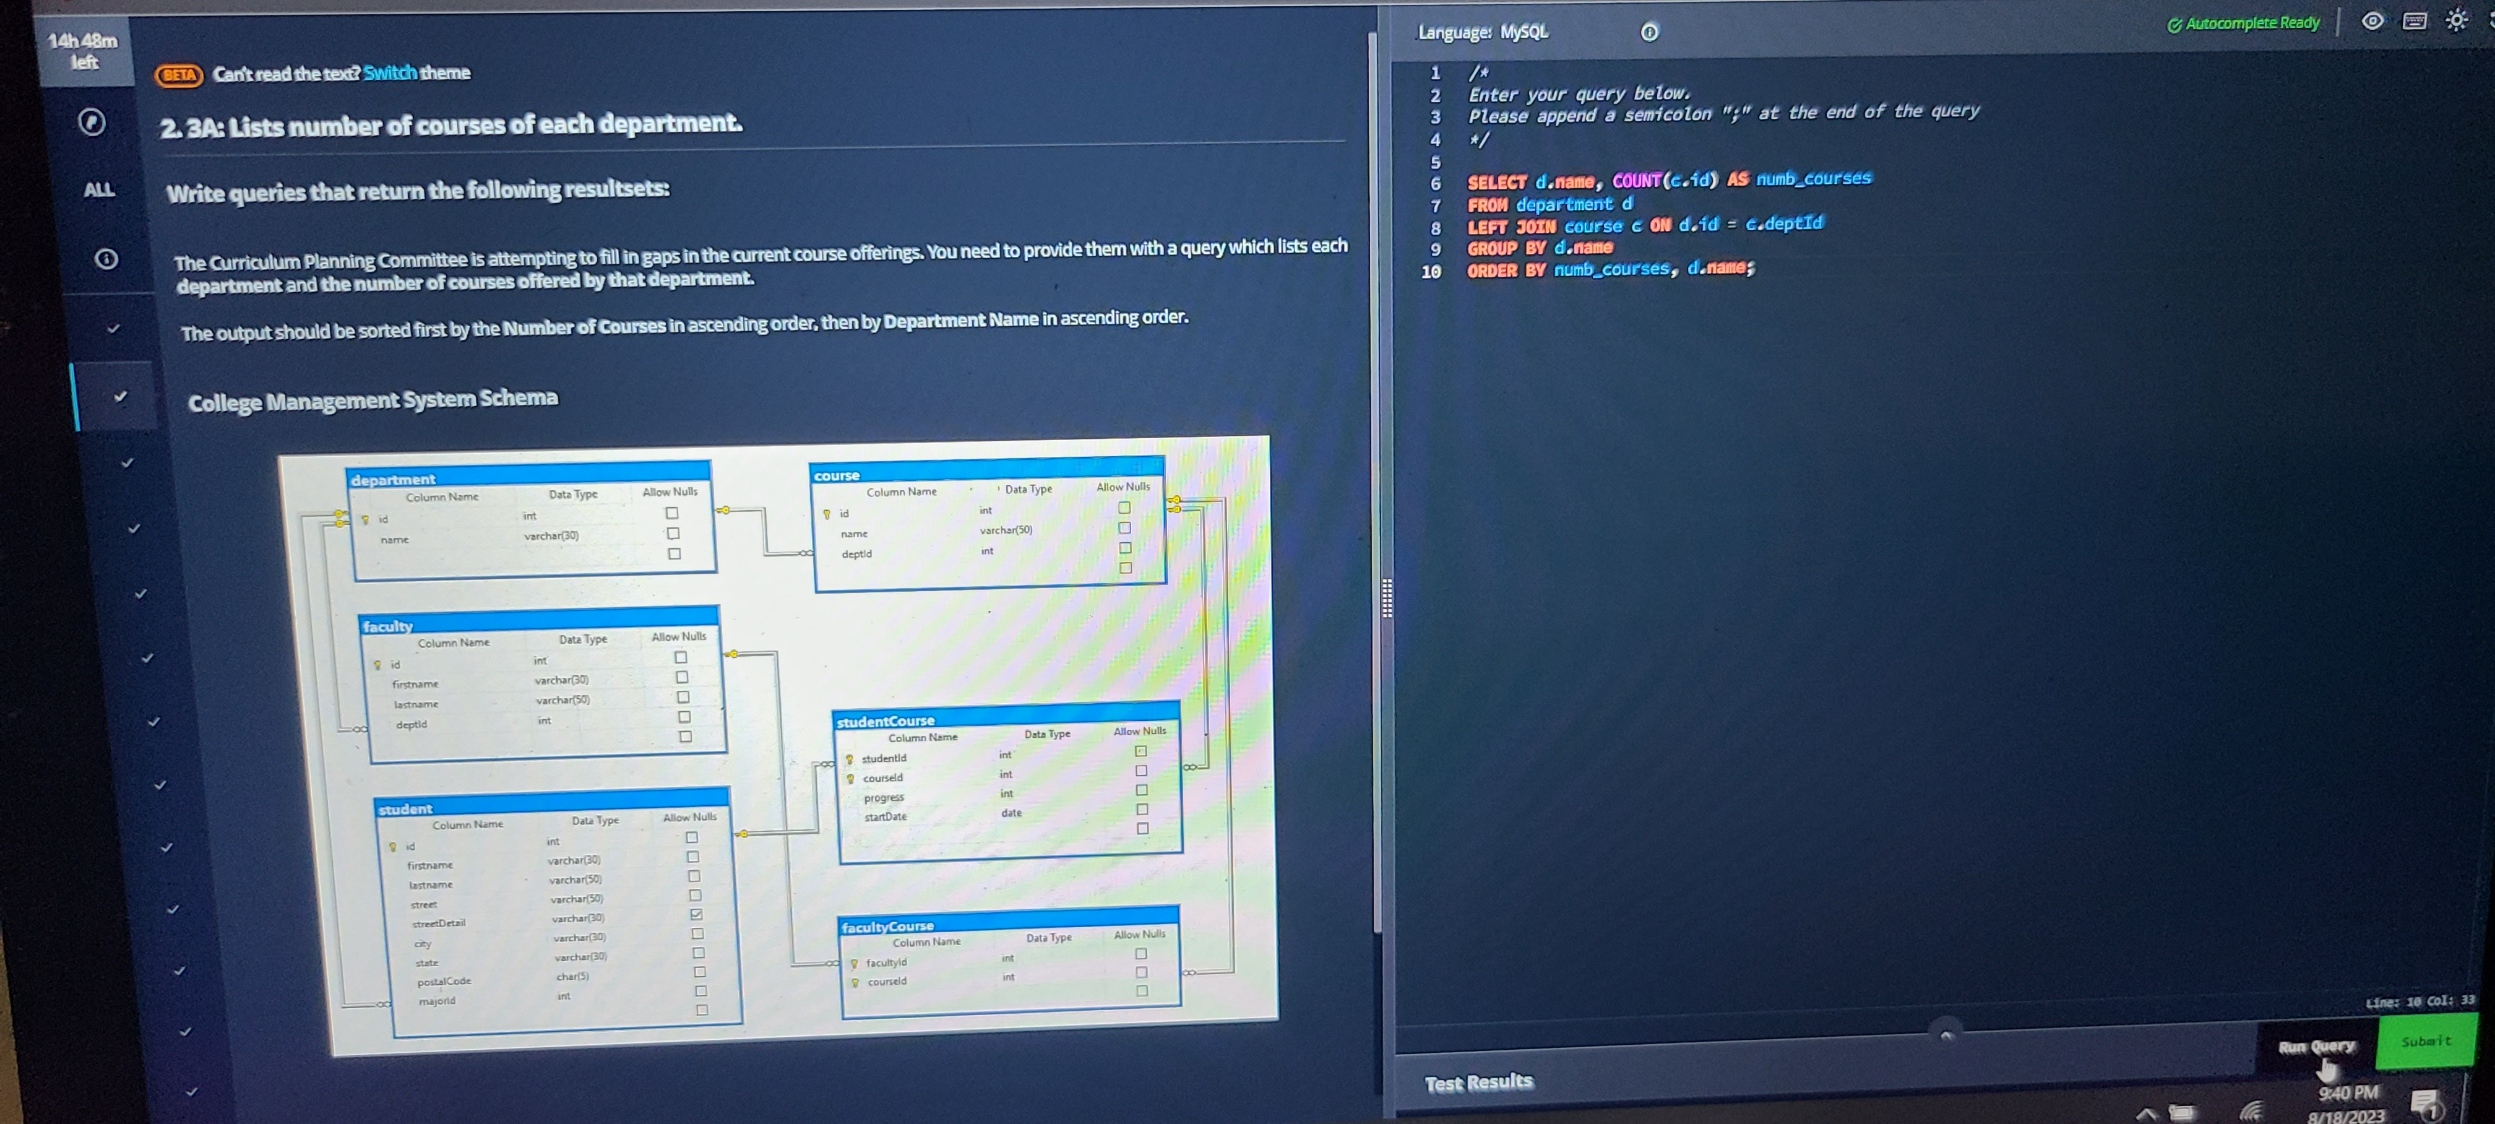

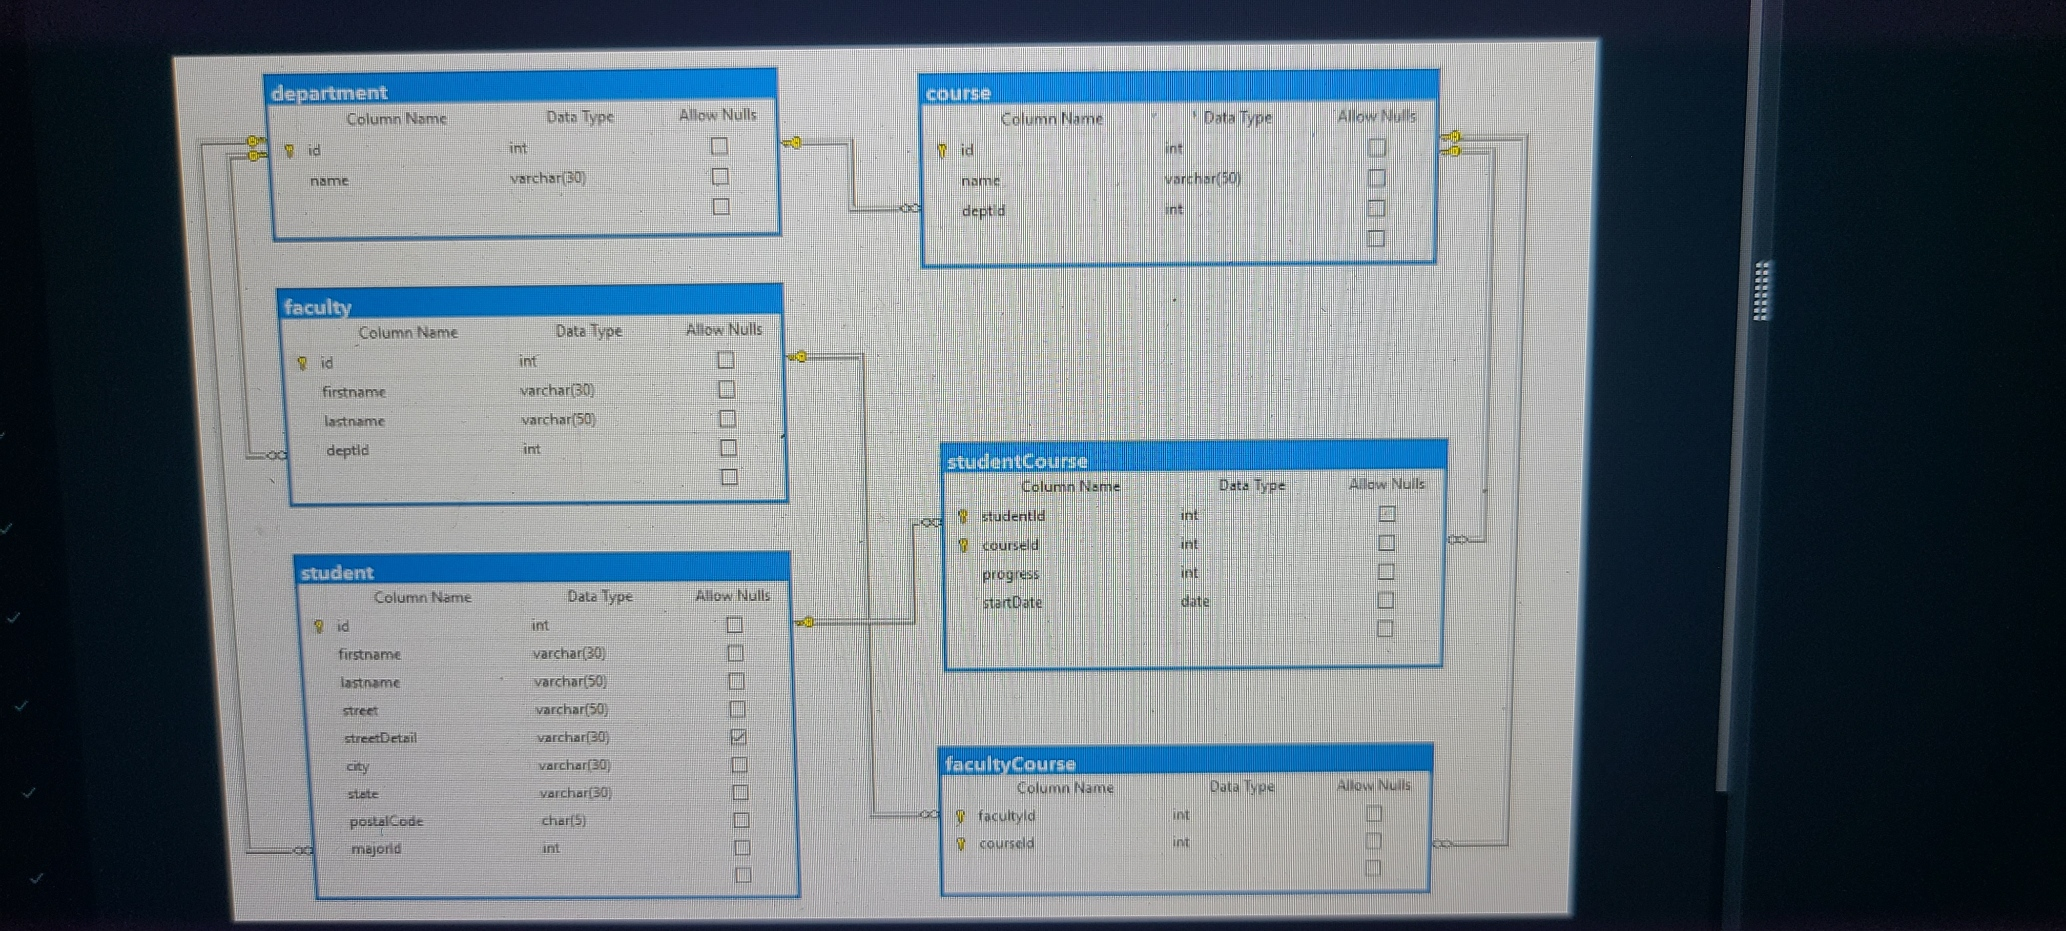

In [ ]:
-- Question #1
SELECT d.name, COUNT(c.id) AS num_courses
FROM department d
LEFT JOIN course c ON d.id = c.deptId
GROUP BY d.name
ORDER BY num_courses, d.name;


In [ ]:
-- Question #2
SELECT
    c.name AS course_name,
    COUNT(s.course_id) AS num_students
FROM
    course c
LEFT JOIN
    studentCourse s ON c.id = s.course_id
GROUP BY
    c.name
ORDER BY
    num_students DESC,
    c.name ASC;

In [ ]:
-- Question #3 
SELECT
    c.name AS course_name,
    COUNT(DISTINCT s.studentid) AS num_students
FROM
    course c
LEFT JOIN
    studentCourse s ON c.id = s.courseid
GROUP BY
    c.name
ORDER BY
    num_students DESC,
    c.name ASC;


In [ ]:
-- Question # 4

SELECT
    c.name AS course_name
FROM
    course c
LEFT JOIN
    facultyCourse fc ON c.id = fc.courseid
GROUP BY
    c.name
HAVING
    COUNT(f.id) = 0
ORDER BY
    course_name ASC;


In [ ]:
-- Question #5

SELECT
    c.name AS course_name,
    COUNT(sc.courseid) AS num_students
FROM
    course c
LEFT JOIN
    facultyCourse fc ON c.id = fc.courseid
LEFT JOIN
    studentCourse sc ON c.id = sc.courseid
GROUP BY
    c.name
HAVING
    COUNT(fc.courseid) = 0
ORDER BY
    num_students DESC,
    course_name ASC;



In [ ]:
-- Question #6

SELECT
    COUNT(DISTINCT studentid) AS Students,
    YEAR(startdate) AS Year
FROM
    studentCourse
GROUP BY
    YEAR(startdate)
ORDER BY
    Year ASC,
    Students DESC;
    


In [ ]:
--  Question # 7

SELECT
    startdate AS Start_Date,
    COUNT(DISTINCT student_id) AS Total_Students
FROM
    studentCourse
WHERE
    MONTH(startdate) = 8
GROUP BY
    startdate
ORDER BY
    Start_Date ASC,
    Total_Students ASC;


In [ ]:
-- Question #8

SELECT
    s.firstname,
    s.lastname,
    COUNT(DISTINCT sc.courseid) AS num_courses
FROM
    student s
JOIN
    studentCourse sc ON s.id = sc.studentid
JOIN
    course c ON sc.courseid = c.id
JOIN
    department d ON s.majorid = d.id
WHERE
    c.deptid = d.id
GROUP BY
    s.id
ORDER BY
    num_courses DESC,
    s.firstname ASC,
    s.lastname ASC;


In [ ]:
-- Question #9

SELECT
    s.firstname,
    s.lastname,
    ROUND(AVG(sc.progress), 1) AS average_progress
FROM
    student s
JOIN
    studentCourse sc ON s.id = sc.studentid
GROUP BY
    s.id
HAVING
    AVG(sc.progress) < 50
ORDER BY
    average_progress DESC,
    s.firstname ASC,
    s.lastname ASC;
    


In [ ]:
-- Question #10

SELECT
    c.name AS course_name,
    ROUND(AVG(sc.progress), 1) AS average_progress
FROM
    course c
LEFT JOIN
    studentCourse sc ON c.id = sc.courseid
GROUP BY
    c.id
ORDER BY
    average_progress DESC,
    course_name ASC;


In [ ]:
-- Question #11

SELECT
    c.name AS course_name,
    ROUND(AVG(sc.progress), 1) AS average_progress
FROM
    course c
JOIN
    studentCourse sc ON c.id = sc.courseid
GROUP BY
    c.id
ORDER BY
    average_progress DESC
LIMIT 1;


In [ ]:
-- Question #12

SELECT
    f.firstname AS faculty_first_name,
    f.lastname AS faculty_last_name,
    ROUND(AVG(sc.progress), 1) AS overall_average_progress
FROM
    faculty f
JOIN
    facultyCourse fc ON f.id = fc.facultyid
JOIN
    studentCourse sc ON fc.courseid = sc.courseid
GROUP BY
    f.id
ORDER BY
    overall_average_progress DESC,
    faculty_first_name ASC,
    faculty_last_name ASC;


In [ ]:
-- Question #13

SELECT
    s.firstname,
    s.lastname,
    CASE
        WHEN MIN(sc.progress) < 40 THEN 'F'
        WHEN MIN(sc.progress) < 50 THEN 'D'
        WHEN MIN(sc.progress) < 60 THEN 'C'
        WHEN MIN(sc.progress) < 70 THEN 'B'
        ELSE 'A'
    END AS minimum_grade,
    CASE
        WHEN MAX(sc.progress) < 40 THEN 'F'
        WHEN MAX(sc.progress) < 50 THEN 'D'
        WHEN MAX(sc.progress) < 60 THEN 'C'
        WHEN MAX(sc.progress) < 70 THEN 'B'
        ELSE 'A'
    END AS maximum_grade
FROM
    student sstudentcoursestudentcourse
JOIN
    studentCourse sc ON s.id = sc.studentid
GROUP BY
    s.id
ORDER BY
    minimum_grade DESC,
    maximum_grade DESC,
    s.firstname ASC,
    s.lastname ASC;